In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [27]:
files_paths = glob.glob('emoji_challenge/*/*.jpg')
print(f'Total: {len(files_paths)}')
files_paths = [file for file in files_paths if 'problematic' not in file]
print(f'Excluding problematic: {len(files_paths)}')

Total: 200911
Excluding problematic: 199061


In [23]:
for folder in os.listdir('emoji_challenge'):
    if os.path.isdir(os.path.join('emoji_challenge', folder)):
        print(f'{folder}: {len(os.listdir(os.path.join("emoji_challenge", folder)))}')

eye_roll: 14580
sad: 2691
kiss: 36356
very_sad_problematic: 228
cringe: 11988
surprise: 17031
angry: 38750
surprise_problematic: 176
kiss_problematic: 487
here_we_go: 21906
clenched_teeth_problematic: 83
disgust_problematic: 194
sad_problematic: 20
angry_problematic: 396
very_sad: 21670
eye_roll_problematic: 151
clenched_teeth: 9732
cringe_problematic: 115
disgust: 24357


emoji_challenge/eye_roll/6666153962829253894_frame_5.jpg


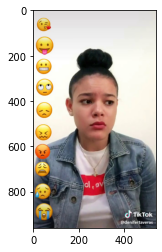

In [8]:
random_idx = 0
print(files_paths[random_idx])
image = cv2.imread(files_paths[random_idx])[...,::-1]
plt.imshow(image)

In [4]:
# This function crops the image to be square with its dimensions min(height, width) x min(height, width)
def crop_img(img): 
    center = (img.shape[0]//2, img.shape[1]//2)
    half_len = min(center[0], center[1])
    img = img[center[0]-half_len:center[0]+half_len, center[1]-half_len:center[1]+half_len]
    return img

In [9]:
# This function zero-pads the image on the top+bottom/left+right so that it's a square
def zero_pad_img(img):
    height, width, channels = img.shape
    if width > height:
        pad_amt = (width - height) // 2
        img = cv2.copyMakeBorder(img, pad_amt, pad_amt, 0, 0, cv2.BORDER_CONSTANT, value=0)
    else:
        pad_amt = (height - width) // 2
        img = cv2.copyMakeBorder(img, 0, 0, pad_amt, pad_amt, cv2.BORDER_CONSTANT, value=0)
    return img

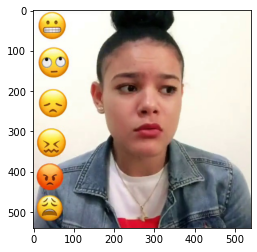

In [7]:
image = crop_img(image)
plt.imshow(image)

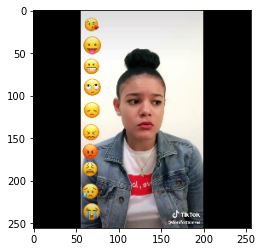

In [10]:
image = zero_pad_img(image)
image = cv2.resize(image, (256, 256))
plt.imshow(image)

In [33]:
%%time
if not os.path.exists('resized_emoji_challenge'):
    os.makedirs('resized_emoji_challenge')
for file in files_paths:
    relative_path = os.path.join(*(file.split(os.path.sep)[1:]))
    folder, filename = os.path.split(relative_path)
    if not os.path.exists(os.path.join('resized_emoji_challenge', folder)):
        os.makedirs(os.path.join('resized_emoji_challenge', folder))
    image = cv2.imread(file)
    image = zero_pad_img(image)
    image = cv2.resize(image, (256, 256))
    cv2.imwrite(os.path.join('resized_emoji_challenge/', folder, filename), image)

CPU times: user 34min 24s, sys: 3min 26s, total: 37min 51s
Wall time: 41min 51s
